In [76]:
#import the useful libraries.
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
# Statistical libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [79]:
#Read dataset movies
movies = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\Alfido\Movielens\movies.dat", sep = '::', engine='python', encoding='latin', names=['MovieID','Title','Category'])
movies.head()

,MovieID,Title,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [80]:
# read dataset ratings
ratings = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\Alfido\Movielens\ratings.dat", sep = '::', engine='python')
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timedstamp']
ratings.dropna(inplace=True)

In [81]:
ratings.head()

,UserID,MovieID,Rating,Timedstamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [82]:
#Read the Users dataset
users = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\Alfido\Movielens\users.dat", sep = '::', engine='python', names=['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [83]:
#Display the nulls and the datatypes
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MovieID   3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Category  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [84]:
# Merge the datasets movies, ratings and users with movieID and UserID
users = pd.merge(ratings,users, on=['UserID'])
movies = pd.merge(ratings,movies, on=['MovieID'])
df=pd.merge(users,movies, on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]
df.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,661,James and the Giant Peach (1996),1,1,F,10,3
1,914,My Fair Lady (1964),1,1,F,10,3
2,3408,Erin Brockovich (2000),1,1,F,10,4
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
4,1197,"Princess Bride, The (1987)",1,1,F,10,3


In [86]:
df.dropna(axis = "index" , inplace = True)

In [87]:
# Print Null values in df
df.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

In [89]:
df.shape

(1000208, 7)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MovieID     3883 non-null   float64
 1   Title       3883 non-null   object 
 2   Category    3883 non-null   object 
 3   UserID      3883 non-null   int64  
 4   MovieID     3883 non-null   int64  
 5   Rating      3883 non-null   int64  
 6   Timedstamp  3883 non-null   int64  
 7   UserID      3883 non-null   float64
 8   Gender      3883 non-null   object 
 9   Age         3883 non-null   float64
 10  Occupation  3883 non-null   float64
 11  Zip-code    3883 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 394.4+ KB


In [90]:
df1[df1['Rating'] == 5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
5,1287,Ben-Hur (1959),1,1,F,10,5
6,2804,"Christmas Story, A (1983)",1,1,F,10,5
9,595,Beauty and the Beast (1991),1,1,F,10,5
13,1035,"Sound of Music, The (1965)",1,1,F,10,5
...,...,...,...,...,...,...,...
1000193,1077,Sleeper (1973),6040,25,M,6,5
1000198,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000199,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5


In [68]:
# Print movies with 5 rating and age is below 30 years
df1[(df1['Rating'] == 5) & (df1['Age'] < 30 ) ] 

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,2355,"Bug's Life, A (1998)",1,1,F,10,5
5,1287,Ben-Hur (1959),1,1,F,10,5
6,2804,"Christmas Story, A (1983)",1,1,F,10,5
9,595,Beauty and the Beast (1991),1,1,F,10,5
13,1035,"Sound of Music, The (1965)",1,1,F,10,5
...,...,...,...,...,...,...,...
1000193,1077,Sleeper (1973),6040,25,M,6,5
1000198,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000199,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000204,1094,"Crying Game, The (1992)",6040,25,M,6,5


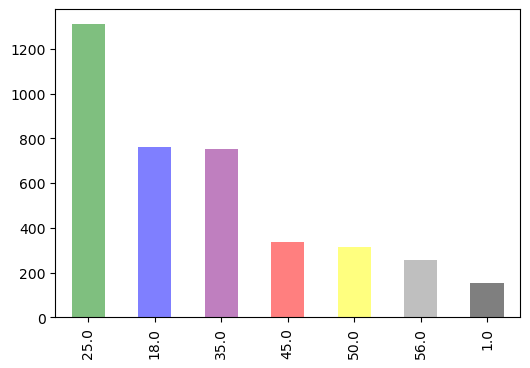

In [99]:
df['Age'].value_counts().plot(x='Age', kind='bar', color= ['green', 'blue', 'purple', 'red', 'yellow', 'grey', 'black'],alpha=0.5,figsize=(6,4))
plt.show()

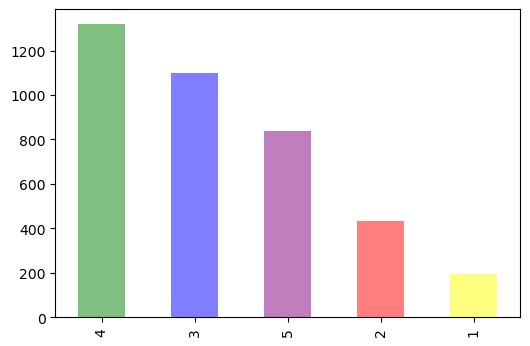

In [94]:
df['Rating'].value_counts().plot(kind='bar', color= ['green', 'blue', 'purple', 'red', 'yellow', 'grey', 'black'],alpha=0.5,figsize=(6,4))
x = 'Rating'
plt.show()

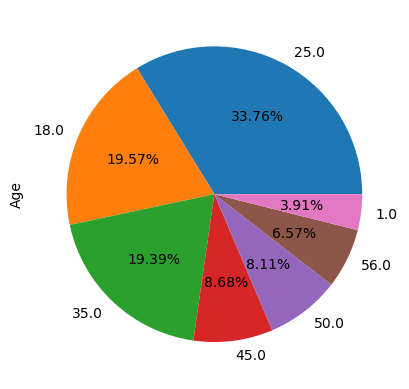

In [100]:
# Plot the pie chart of Age categories 
target_counts = df['Age'].value_counts(normalize=True)
target_counts.plot.pie(autopct='%1.2f%%')
plt.show()

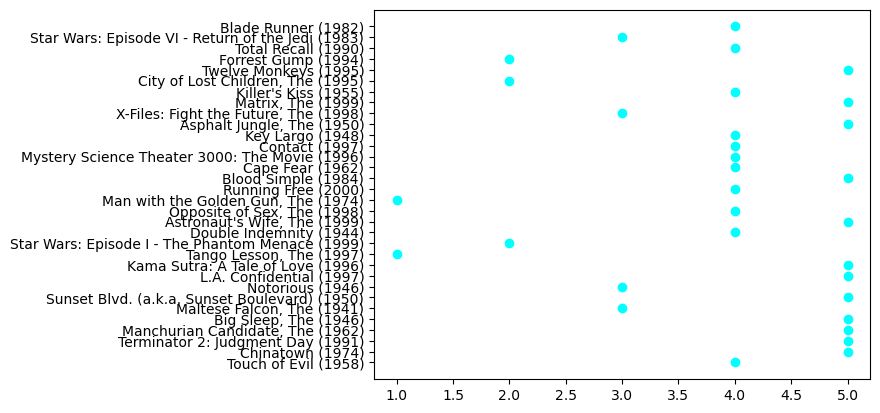

In [184]:
# plot a scatter plot for rating and Title
data = df1[df1.UserID==700]
plt.scatter(y = data.Title , x = data.Rating , color = "aqua")
plt.show()

In [110]:
# plot a chart to check correlation between the variables
df1.corr()

,MovieID,UserID,Age,Occupation,Rating
MovieID,1.000000,-0.017740,0.027573,0.008585,-0.064041
UserID,-0.017740,1.000000,0.034684,-0.026697,0.012305
Age,0.027573,0.034684,1.000000,0.078372,0.056872
Occupation,0.008585,-0.026697,0.078372,1.000000,0.006753
Rating,-0.064041,0.012305,0.056872,0.006753,1.000000


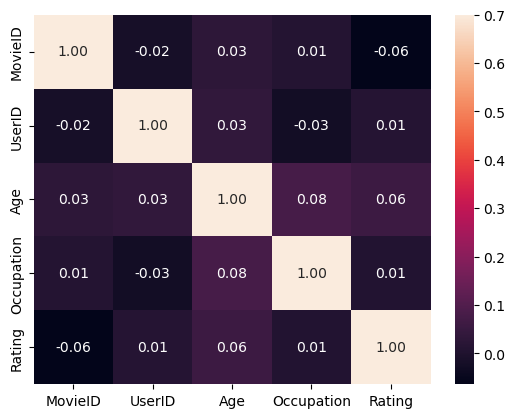

In [129]:
# plot a Heatmap to Check the correlation with the variables
sns.heatmap(df1.corr(), vmax=0.7, fmt='.2f', annot = True)
plt.show()

##### Findings of Heatmap:-
- The negative values shows that there is a very weak correlation between some variables like movieId and rating, UserId and occupation.
- The positive values shows that there is some weak positive correlation between the variables like Age and Occupation. 

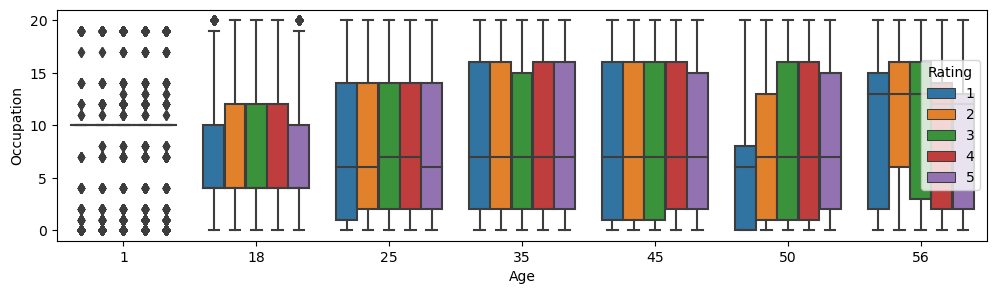

In [141]:
# Plot Bloxplot for outliers
plt.figure(figsize = (12, 3))
sns.boxplot(x = 'Age', y = 'Occupation', hue = 'Rating', data = df1)
plt.show()

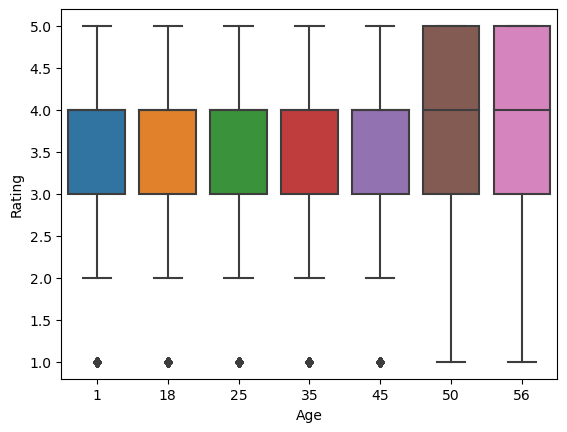

In [91]:
sns.boxplot(x = 'Age', y = 'Rating', data = df1)
plt.show()

### Machine Learning : Further Classification of DataFrame using Various Algorithms


In [92]:
# first 500 records
f_500 = df1[500:]
f_500.dropna(inplace=True)

In [93]:
# Use the Features or Columns: movieID, age, occupation as X
X = f_500[['MovieID', 'Age', 'Occupation']].values

In [94]:
# use the Rating column as y
y= f_500[['Rating']].values

In [95]:
#Create train and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

## Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
log_score = round(logreg.score(X_train, y_train) * 100, 2)
log_score

34.89

## Decision tree

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

56.56

## K Nearest Neighbors Classifier

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score

44.96

## Gaussian Naive Bayes

In [43]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian_score = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_score

34.93